In [104]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import numpy as np
import tellurium as te
import os
import pickle
import seaborn as sns

In [41]:
# Set Matplotlib rcParams to configure line widths globally
mpl.rcParams['lines.linewidth'] = 2  # Line width for all lines
mpl.rcParams['axes.linewidth'] = 2   # Line width of axes
mpl.rcParams['xtick.major.width'] = 2  # Line width of major x-ticks
mpl.rcParams['xtick.minor.width'] = 2  # Line width of minor x-ticks
mpl.rcParams['ytick.major.width'] = 2  # Line width of major y-ticks
mpl.rcParams['ytick.minor.width'] = 2  # Line width of minor y-ticks

In [42]:

def load_file(file_loc: str):
    '''
    Function to load file either json or pickled .txt
    ---------------------------------------------------
    Parameter:
    file_loc: str path to file
    ---------------------------------------------------
    returns:
    data: either unpickled tuple or list 
    '''
    if file_loc.endswith('.txt'):
            with open(file_loc, 'rb') as g:
                # data = tuple with [0]=score, [1]=parameter_dict
                data = pickle.loads(g.read())
    else:
        with open(file_loc, 'r') as g:
            # data = list with [0]=score, [1]=parameter_dict
            data = json.loads(g.read())

    return data

def get_parameter_sets(d_path, dir):
    '''
    Description: function to find the best scoring parameter set for specified model
    -----------
    Parameter:
    d_path: pathway to directory with parameter sets
    n_sets: number of best sets 
    ----------
    returns:
    dresults: pd.DataFrame() with best score as name and parameter names as index
    '''
    d_path = d_path+f'/{dir}'
    files = os.listdir(d_path)
    files = [file for file in files if '.json' in file]
    
    dresults = pd.DataFrame()
    for file in files:
        filename = file
        path = d_path+'/'
        
        data = load_file(path+filename)
        #print(data["update_parameters"])
        # add score to dict for later use
        #data[1]['score'] = data[0]
        dnew = pd.DataFrame.from_dict(data["update_parameters"], orient='index',columns=['Value'])
        # dataframe with each colume parameter set of estimation and name = score 
        dresults[str(data["best_score"])] = dnew['Value']
    # sort the colums names to find lowest estimation score   
    results = sorted(list(map(float, dresults.columns.to_list())))
    results = np.asarray(results,dtype=str)
        
    return dresults

In [43]:
path = '../Estimation/'
dir_locs = [#'general', 
            'Hapto', 
            'immune']
pth_ar = []
for i,dir in enumerate(dir_locs):
    pth_ar.append(get_parameter_sets(path+dir, 'pth'))

In [44]:
pth_ar[1].T.describe()

,E,R,P,k_P_birth,LDH_RBC,k_E_infect,tropism,M,a_P_d,k_P_d,...,k_digest_R,beta_Treg,beta_in_Treg,delta_Treg,mu_tox,mu_in_tox,V_f,K_f,delta_Ttox,epsilon
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000e+00,7.000000,...,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,5.627453e+06,67109.369976,558.513039,527.167163,4.979105e-10,1.281766e-06,91.971735,408.629886,1.244578e+06,4.556143,...,3.022782e-05,0.006750,0.943267,28.786707,12.111862,171.796209,75.927444,112.359244,60.741563,0.018500
std,2.387268e+05,10094.656831,142.029700,116.271827,5.618274e-11,7.038685e-07,89.534678,798.470110,2.670164e+06,4.190868,...,7.969822e-05,0.015925,0.830865,29.757055,31.822812,193.057084,50.838457,95.326639,27.623950,0.047579
min,5.529656e+06,48645.790606,271.212640,274.737384,3.908847e-10,7.020838e-07,2.000000,100.000014,3.235125e+03,0.269607,...,1.963590e-12,0.000100,0.003369,0.511031,0.001000,1.000298,7.972305,4.540137,7.402732,0.000003
25%,5.532161e+06,61938.417941,527.151820,538.541411,4.799784e-10,7.896257e-07,6.508949,100.105742,1.717591e+05,0.323634,...,1.168757e-11,0.000103,0.301750,3.614161,0.004492,42.868310,55.002431,13.840918,54.776157,0.000045
50%,5.534468e+06,72425.633736,601.232177,554.148648,5.230615e-10,1.178188e-06,86.618737,100.659134,2.520342e+05,5.383949,...,1.364486e-09,0.000200,0.839720,15.237272,0.010540,104.285728,72.259362,177.820912,71.666253,0.000549
75%,5.547577e+06,74271.192276,649.161125,573.736716,5.242949e-10,1.389472e-06,171.435589,120.227121,4.116969e+05,7.829717,...,3.138695e-07,0.002000,1.578155,54.860973,0.242144,227.452507,84.851458,189.841352,76.245627,0.001235
max,6.168570e+06,76274.945057,684.520568,636.727855,5.628810e-10,2.733896e-06,199.294332,2219.084326,7.289866e+06,9.932744,...,2.109656e-04,0.042746,1.999973,68.808375,84.278224,556.645804,171.552662,196.789122,84.078385,0.126389


<Axes: >

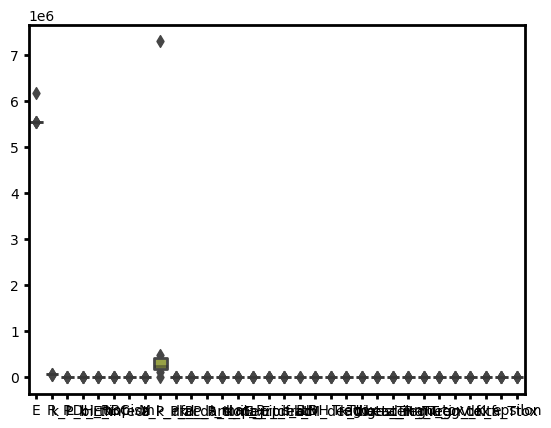

Index(['LDH_RBC', 'k_E_infect', 's_BH', 'k_digest_R', 'beta_Treg', 'epsilon',
       'fac_R_d', 'k_iE_pit_frac', 'beta_in_Treg', 'k_P_art_max', 'r_P_d',
       'k_P_d', 'slope_rpi', 'mu_tox', 't_mat_P', 'delta_Treg', 'delta_Ttox',
       'k_M_death', 'V_f', 'tropism', 'K_f', 't_E_death', 'mu_in_tox', 'Ttox',
       'LDH', 'M', 'k_P_birth', 'P', 'Treg', 'R', 'a_P_d', 'E'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


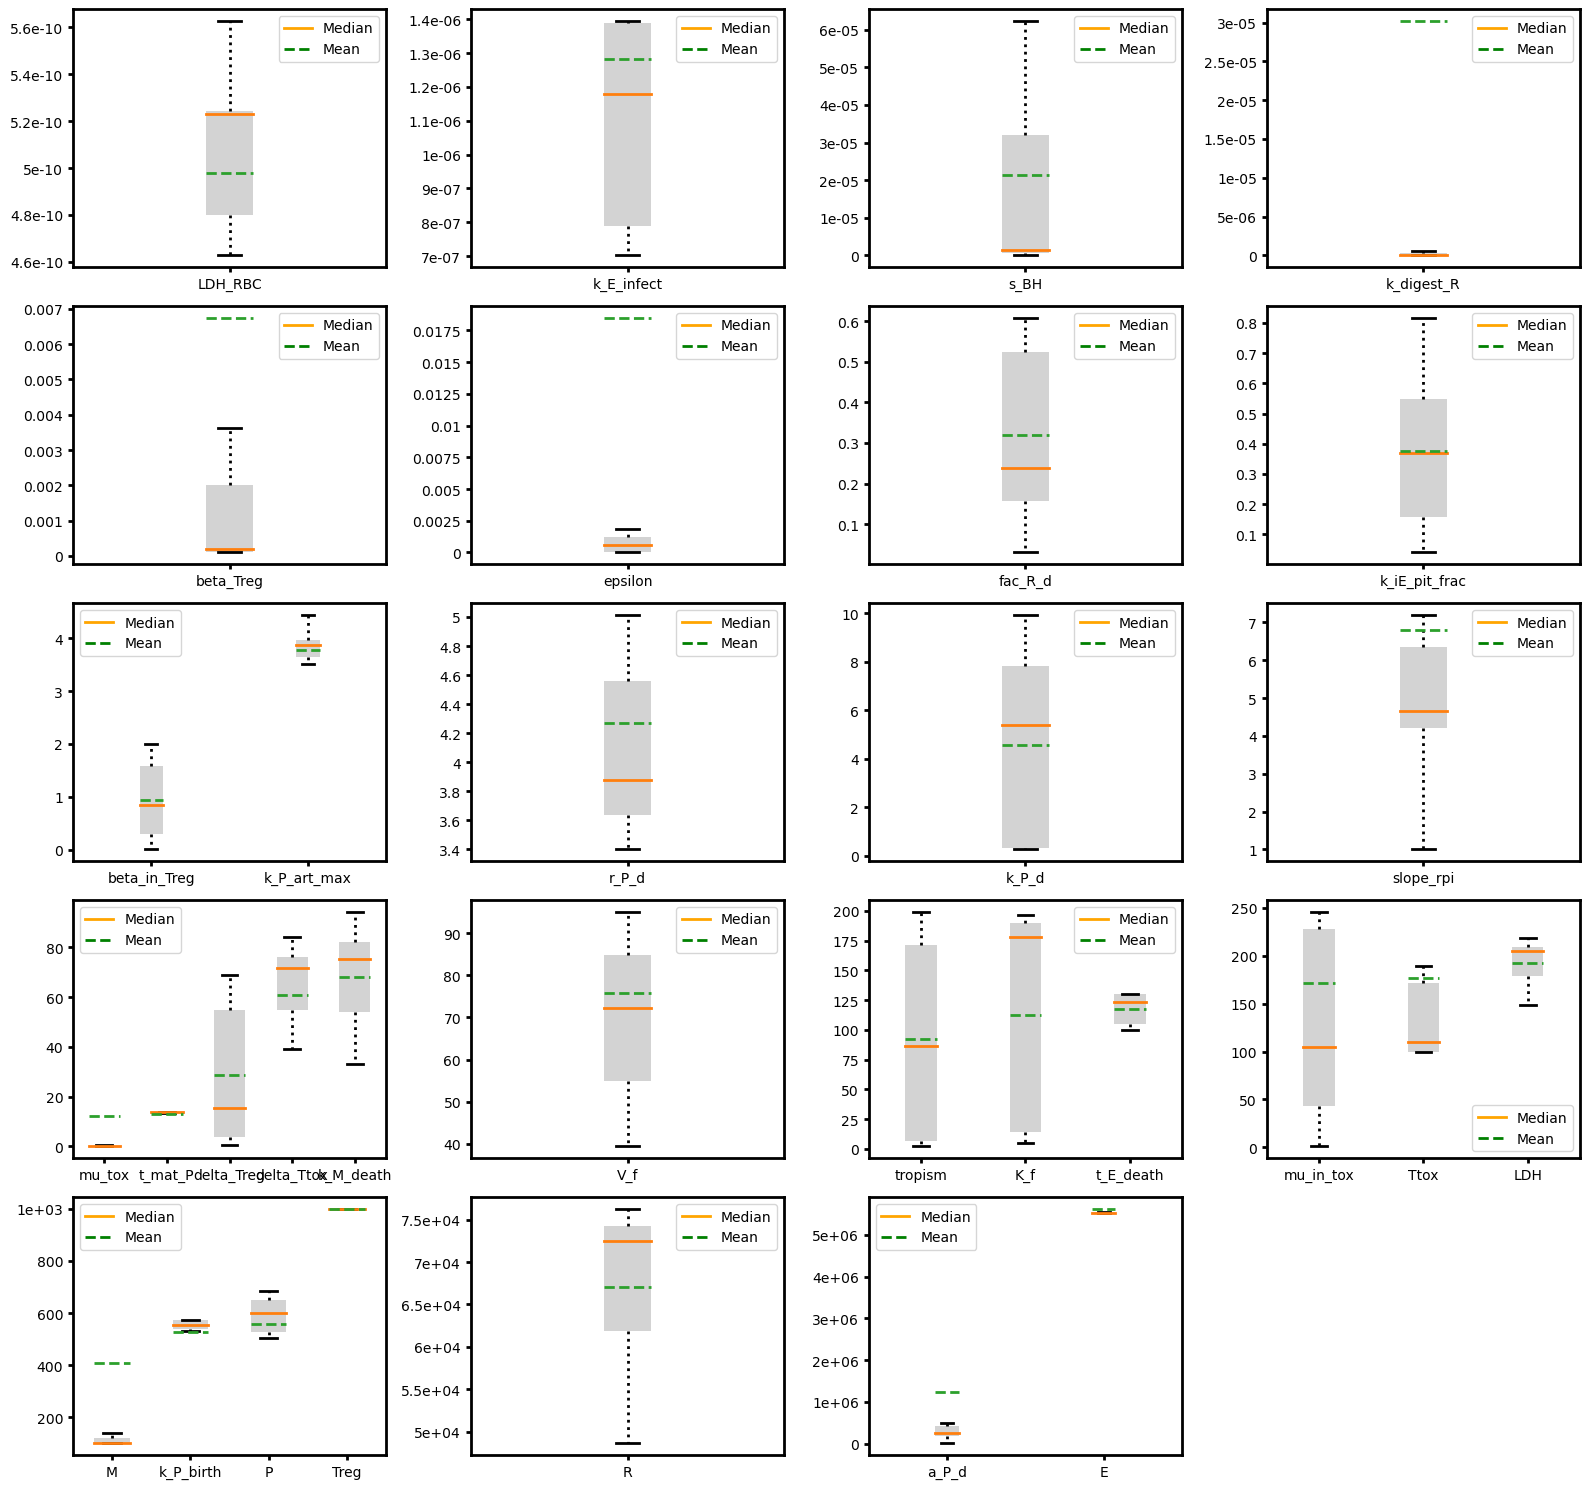

In [158]:
# Function to categorize columns based on data range
def categorize_columns(df):
    column_means = df.mean()
    sorted_columns = column_means.sort_values().index
    print(sorted_columns)
    column_groups = []
    current_group = []
    current_max = df[sorted_columns[0]].max()
    
    for col in sorted_columns:
        if (df[col].max() - df[col].min()) > current_max:
            column_groups.append(current_group)
            current_group = [col]
            current_max = df[col].max()
        else:
            current_group.append(col)
    
    if current_group:
        column_groups.append(current_group)
    
    return column_groups
df = pth_ar[1].T
# Get column groups based on data ranges
column_groups = categorize_columns(df)

# Plotting boxplots in subplots
n_cols = 4
n_rows = int(np.ceil(len(column_groups)/n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, squeeze=True, figsize=(n_cols*4, n_rows*3))

meanlineprops = dict(linewidth=2)
for i, columns in enumerate(column_groups):
    df_boxplot = df[columns]
    bp = df_boxplot.boxplot(ax=axes.flatten()[i], vert=True, 
                       showmeans=True, meanline=True, showfliers=False, patch_artist=True,#notch=True,
                       boxprops=dict(linewidth=0, facecolor='lightgrey'), medianprops=dict(linewidth=2),
                       whiskerprops=dict(ls='dotted', linewidth=2), capprops=dict(linewidth=2),
                       flierprops=dict(markersize=8), meanprops=meanlineprops)
    
    axes.flatten()[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.3g}'))
    axes.flatten()[i].grid(False)
    # Add mean and median to legend
    handles, labels = axes.flatten()[i].get_legend_handles_labels()
    median_handle = plt.Line2D([0], [0], color='orange', linewidth=2, label='Median')
    mean_handle = plt.Line2D([0], [0], ls='--', color='green', linewidth=2, label='Mean')
    handles.extend([median_handle, mean_handle])
    axes.flatten()[i].legend(handles=handles,)

if not axes.flatten()[-1].lines: 
    axes.flatten()[-1].set_visible(False)

plt.legend()
plt.tight_layout()
plt.show()

Index(['LDH_RBC', 'k_E_infect', 's_BH', 'k_digest_R', 'beta_Treg', 'epsilon',
       'fac_R_d', 'k_iE_pit_frac', 'beta_in_Treg', 'k_P_art_max', 'r_P_d',
       'k_P_d', 'slope_rpi', 'mu_tox', 't_mat_P', 'delta_Treg', 'delta_Ttox',
       'k_M_death', 'V_f', 'tropism', 'K_f', 't_E_death', 'mu_in_tox', 'Ttox',
       'LDH', 'M', 'k_P_birth', 'P', 'Treg', 'R', 'a_P_d', 'E'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


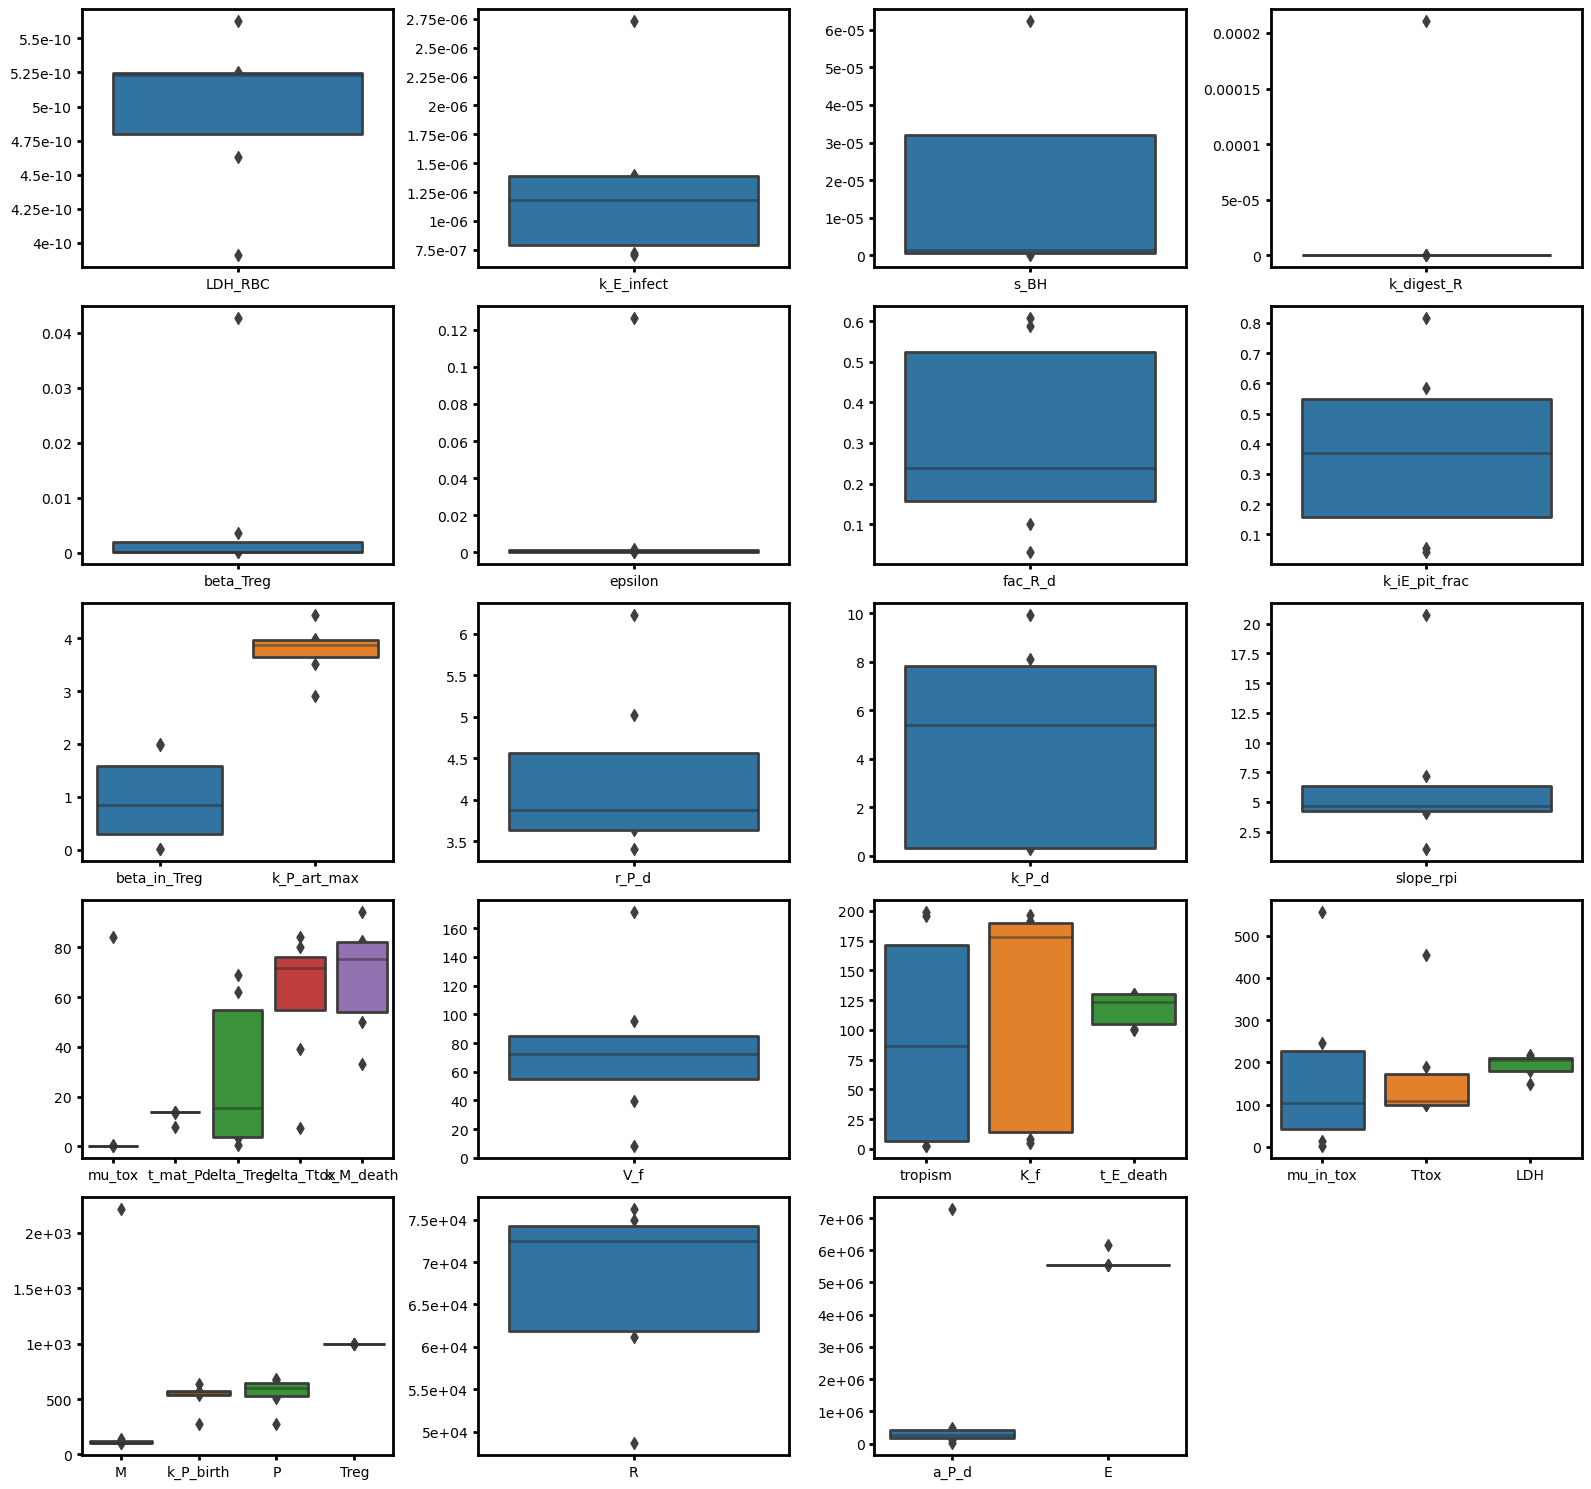

In [157]:
df = pth_ar[1].T
# Get column groups based on data ranges
column_groups = categorize_columns(df)

# Plotting boxplots in subplots
n_cols = 4
n_rows = int(np.ceil(len(column_groups)/n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, squeeze=True, figsize=(n_cols*4, n_rows*3))
# Custom colors for boxplot elements

for i, columns in enumerate(column_groups):
    df_boxplot = df[columns]
    sns.boxenplot(data=df_boxplot, ax=axes.flatten()[i],)
    axes.flatten()[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.3g}'))
    axes.flatten()[i].grid(False)

if not axes.flatten()[-1].lines: 
    axes.flatten()[-1].set_visible(False)

plt.legend()
plt.tight_layout()
plt.show()